Average Views by Category 
 Category
entertainment            1.071333e+06
study/courses            1.600000e+05
study                    1.550000e+05
podcastt& talks          1.200000e+05
/studyCareer guidance    1.200000e+04
Name: Views, dtype: float64 

Average Like-to-Dislike Ratio by Category 
 Category
study                    4050.0
/studyCareer guidance    2000.0
podcastt& talks          1000.0
entertainment              85.0
study/courses              18.0
Name: like_dislike_ratio, dtype: float64 

Missing 'Dislikes' values replaced with 0 
Total missing Dislikes after replacement: 0 

Comparison of Morning vs Night Average Views 
 time_period
Morning     86500.0
Night      867500.0
Name: Views, dtype: float64 



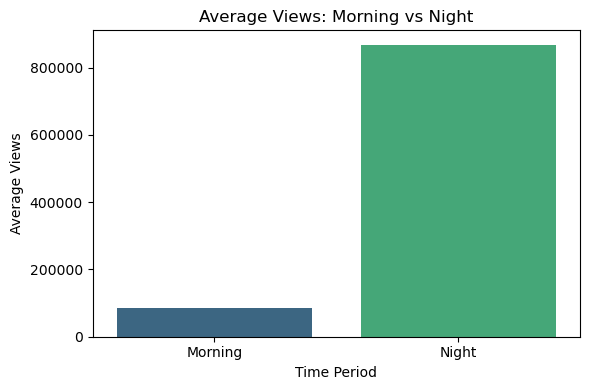

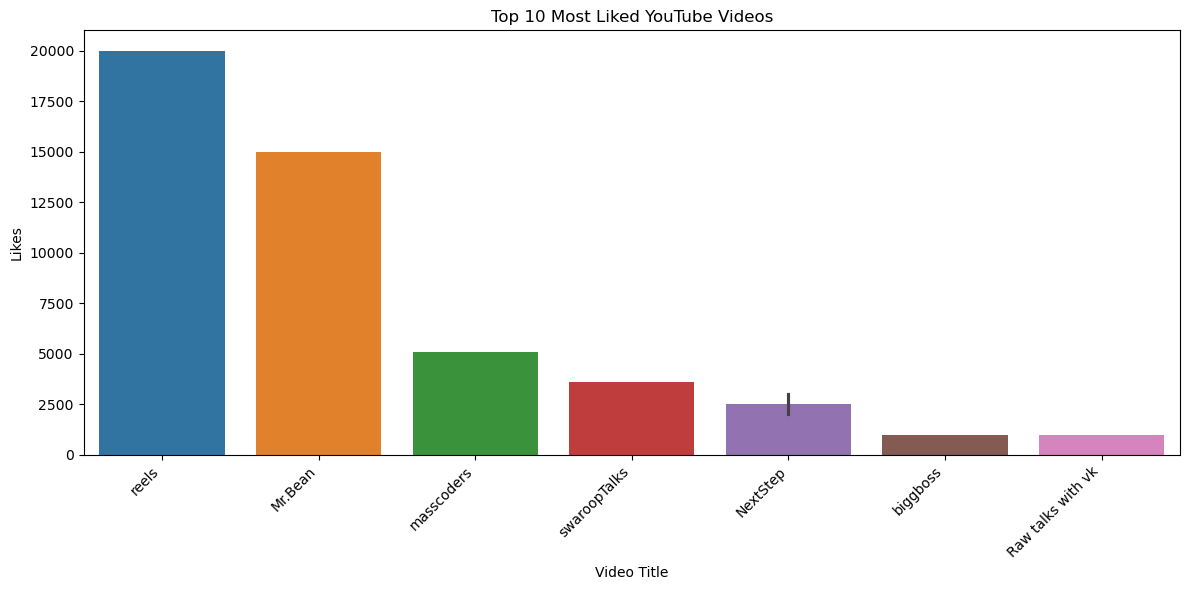

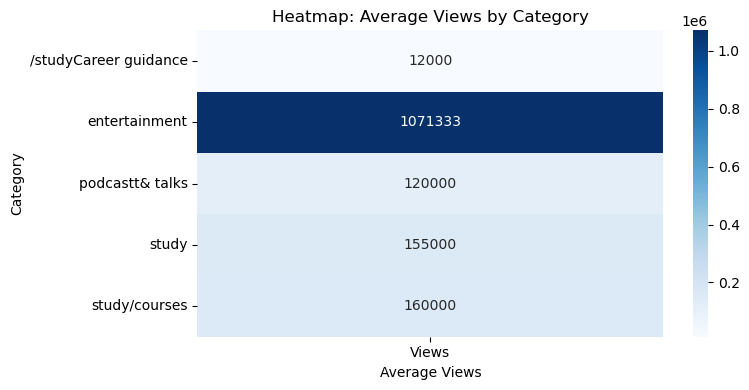

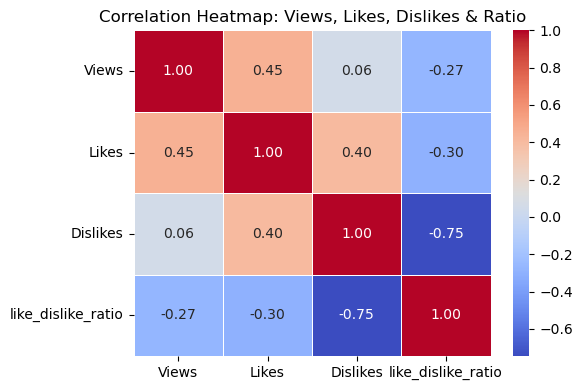

In [3]:
#YouTube Trending Videos Data Analysis case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#LOAD THE DATASET
df = pd.read_csv('C:\\Users\\Lenovo\\Documents\\youtube_trending.csv')
# Clean column names
df.columns = [col.strip() for col in df.columns]
df.rename(columns={'Category ': 'Category'}, inplace=True)
#  DATA CLEANING & PREPARATION
def convert_str_number(val):
    """Convert strings like '1.5K', '2M' to numeric values."""
    if isinstance(val, str):
        val = val.lower().strip()
        if val.endswith('k'):
            return float(val[:-1]) * 1_000
        elif val.endswith('m'):
            return float(val[:-1]) * 1_000_000
        else:
            try:
                return float(val)
            except:
                return np.nan
    return val
df['Views'] = df['Views'].apply(convert_str_number)
df['Likes'] = df['Likes'].apply(convert_str_number)
df['Dislikes'] = pd.to_numeric(df['Dislikes'], errors='coerce')
# Convert publish time to datetime.time
def convert_publish_time(t):
    try:
        return pd.to_datetime(t, format='%I:%M%p').time()
    except:
        return pd.NaT

df['publish_time'] = df['Publish Time'].apply(convert_publish_time)
# Label as Morning or Night
def label_time(t):
    if pd.isna(t):
        return np.nan
    if pd.to_datetime('06:00').time() <= t < pd.to_datetime('18:00').time():
        return 'Morning'
    else:
        return 'Night'
df['time_period'] = df['publish_time'].apply(label_time)
#  ANALYSIS
# Compute average views by category
avg_views = df.groupby('Category')['Views'].mean().sort_values(ascending=False)
print("Average Views by Category \n", avg_views, "\n")
# Analyze like-to-dislike ratio across categories
df['Dislikes_safe'] = df['Dislikes'].replace(0, 1)
df['like_dislike_ratio'] = df['Likes'] / df['Dislikes_safe']
avg_ratio = df.groupby('Category')['like_dislike_ratio'].mean().sort_values(ascending=False)
print("Average Like-to-Dislike Ratio by Category \n", avg_ratio, "\n")
# Replace missing dislikes with zero
df['Dislikes'] = df['Dislikes'].fillna(0)
print("Missing 'Dislikes' values replaced with 0 ")
print("Total missing Dislikes after replacement:", df['Dislikes'].isna().sum(), "\n")
# Compare publishing time (morning vs night) vs views
avg_views_time = df.groupby('time_period')['Views'].mean()
print("Comparison of Morning vs Night Average Views \n", avg_views_time, "\n")
# VISUALIZATIONS
# Bar chart: Morning vs Night
plt.figure(figsize=(6,4))
sns.barplot(x=avg_views_time.index, y=avg_views_time.values, hue=avg_views_time.index, palette='viridis', legend=False)
plt.title('Average Views: Morning vs Night')
plt.xlabel('Time Period')
plt.ylabel('Average Views')
plt.tight_layout()
plt.show()
# Top 10 Most Liked Videos
top10_liked = df.nlargest(10, 'Likes')
plt.figure(figsize=(12,6))
sns.barplot(x='Title', y='Likes', data=top10_liked, hue='Title', dodge=False, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Liked YouTube Videos')
plt.xlabel('Video Title')
plt.ylabel('Likes')
plt.tight_layout()
plt.show()
# Heatmap for Average Views by Category
views_pivot = df.pivot_table(values='Views', index='Category', aggfunc='mean')
plt.figure(figsize=(8, max(4, len(views_pivot)*0.5)))
sns.heatmap(views_pivot, annot=True, fmt=".0f", cmap='Blues')
plt.title('Heatmap: Average Views by Category')
plt.xlabel('Average Views')
plt.ylabel('Category')
plt.tight_layout()
plt.show()
# CORRELATION HEATMAP (Views, Likes, Dislikes, Ratio)
plt.figure(figsize=(6, 4))
corr_cols = ['Views', 'Likes', 'Dislikes', 'like_dislike_ratio']
corr_matrix = df[corr_cols].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Heatmap: Views, Likes, Dislikes & Ratio')
plt.tight_layout()
plt.show()
